# **Equity Portfolio Management Project**

***Data Preparation***

1. Download the historial daily data of the entire 2018 for the 10 stocks universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP']

***Retrieve the "Close" and "Adj Close" values for each stock***

2. Create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

***You start to manage 5 million dollars fund on Jan 02, 2018***

You have a strategy to manage the fund:
   
  1. On Jan 02, 2018: you split the 5 million into 5 of 1 million, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was 154.25 dollars. With 1 million, you can buy max 6482 shares with cost 999848.5 dollars with 151.5 dollars of cash left.
    *   You decided to spend 1 million on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account.
    *   On Jan 02, 2018: your mark to market value (MTM) is 5 million if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio

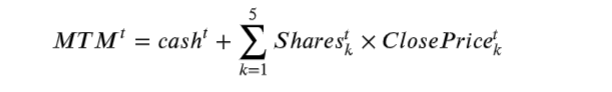

2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works:

  *   You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage.
  *   You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices.
  * You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".
  Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend times
your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend.
  * For example, on 2/8/2018, IBM issued 1.5 dollar dividend per share.

4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.

5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than $5m because you always buy the stocks that dropped the most, i.e., you always buy low.

6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.

7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage
change with regard to Jan 02 2018.

8. Download the USD/JPY 2018 historical data at https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data
(https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data) then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.

9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that
maximizes the MTM on 12/31/2018.



In [ ]:
#Load Library DPLYR
library(dplyr)
library(ggplot2)
library(tidyr)
require(reshape2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [ ]:
defaultW= getOption("warn")
options(warn = -1)

In [ ]:
#Load Stock Data

IBM = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/IBM.csv")[, c("Close", "Adj.Close")]
MSFT = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/MSFT.csv")[, c("Close", "Adj.Close")]
GOOG = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/GOOG.csv")[, c("Close", "Adj.Close")]
AAPL = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/AAPL.csv")[, c("Close", "Adj.Close")]
AMZN = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/AMZN.csv")[, c("Close", "Adj.Close")]
FB = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/FB.csv")[, c("Close", "Adj.Close")]
NFLX= read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/NFLX.csv")[, c("Close", "Adj.Close")]
TSLA = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/TSLA.csv")[, c("Close", "Adj.Close")]
ORCL = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/ORCL.csv")[, c("Close", "Adj.Close")]
SAP = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/SAP.csv")[, c("Close", "Adj.Close")]

Date = read.csv("/Users/maryanastef/Documents/GitHub/CS636_MidtermProject/IBM.csv")[, c("Date")]

In [ ]:
#Rename Columns to have name function
#Rename IBM
names(IBM) = c("IBM.Close","IBM.Adj.Close")
#Rename Amazon
names(AMZN) = c("AMZN.Close","AMZN.Adj.Close")
#Rename Microsoft
names(MSFT) = c("MSFT.Close","MSFT.Adj.Close")
#Rename Google
names(GOOG) = c("GOOG.Close","GOOG.Adj.Close")
#Rename Apple
names(AAPL) = c("AAPL.Close","AAPL.Adj.Close")
#Rename Facebook
names(FB) = c("FB.Close","FB.Adj.Close")
#Rename Netflix
names(NFLX) = c("NFLX.Close","NFLX.Adj.Close")
#Rename Tesla
names(TSLA) = c("TSLA.Close","TSLA.Adj.Close")
#Rename Oracle
names(ORCL) = c("ORCL.Close","ORCL.Adj.Close")
#Rename SAP
names(SAP) = c("SAP.Close","SAP.Adj.Close")



<h2> <b> Retrieve the "Close" and "Adj Close" values for each stock </b> <h2>
    You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

In [ ]:
#Add all Stocks to Dataframe
market = as.data.frame(cbind(Date, IBM, AMZN,MSFT,GOOG,AAPL, FB, NFLX, TSLA,ORCL, SAP))

In [ ]:
head(market)

Date,IBM.Close,IBM.Adj.Close,AMZN.Close,AMZN.Adj.Close,MSFT.Close,MSFT.Adj.Close,GOOG.Close,GOOG.Adj.Close,AAPL.Close,...,FB.Close,FB.Adj.Close,NFLX.Close,NFLX.Adj.Close,TSLA.Close,TSLA.Adj.Close,ORCL.Close,ORCL.Adj.Close,SAP.Close,SAP.Adj.Close
2018-01-02,154.25,129.0939,1189.01,1189.01,85.95,81.84829,1065.00,1065.00,43.0650,...,181.42,181.42,201.07,201.07,64.106,64.106,46.63,43.82148,112.39,105.9143
2018-01-03,158.49,132.6424,1204.20,1204.20,86.35,82.22920,1082.48,1082.48,43.0575,...,184.67,184.67,205.05,205.05,63.450,63.450,47.71,44.83644,113.31,106.7813
2018-01-04,161.70,135.3289,1209.59,1209.59,87.11,82.95293,1086.40,1086.40,43.2575,...,184.33,184.33,205.63,205.63,62.924,62.924,48.18,45.27813,115.05,108.4210
2018-01-05,162.49,135.9901,1229.14,1229.14,88.19,83.98138,1102.23,1102.23,43.7500,...,186.85,186.85,209.99,209.99,63.316,63.316,48.47,45.55065,116.33,109.6273
2018-01-08,163.47,136.8102,1246.87,1246.87,88.28,84.06710,1106.94,1106.94,43.5875,...,188.28,188.28,212.05,212.05,67.282,67.282,48.98,46.02994,114.80,108.1854
2018-01-09,163.83,137.1115,1252.70,1252.70,88.22,84.00996,1106.26,1106.26,43.5825,...,187.87,187.87,209.31,209.31,66.738,66.738,49.06,46.28467,114.16,107.5823


<h2> <b> You start to manage 5 million dollars fund on Jan 02, 2018 </b> </h2>
<br></br>
    You have a strategy to manage the fund.

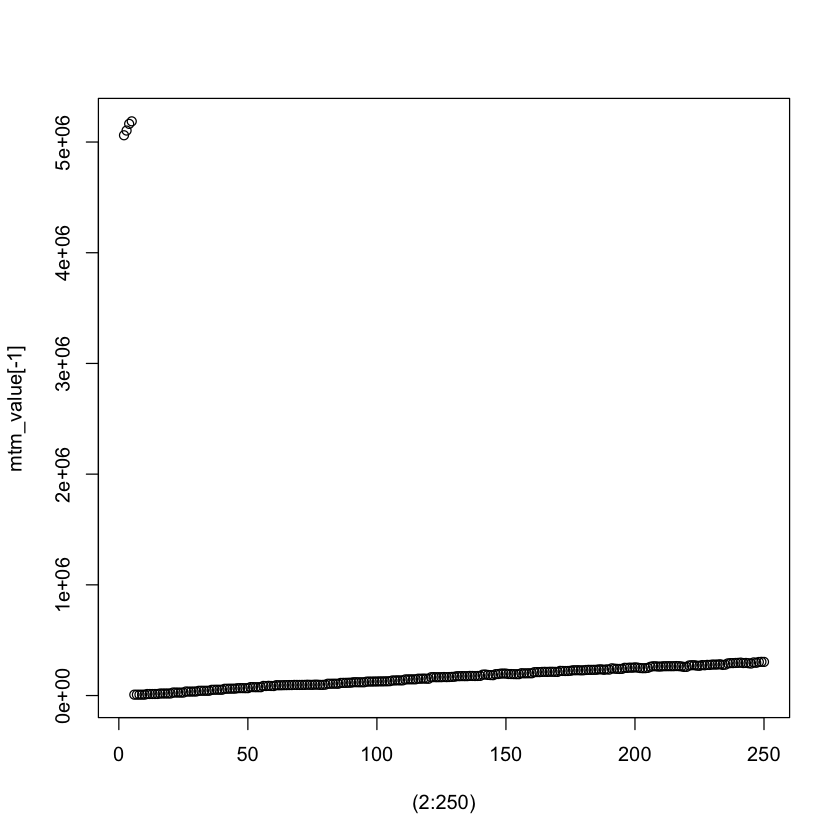

ERROR: Error in rowMeans(htday): 'x' must be numeric


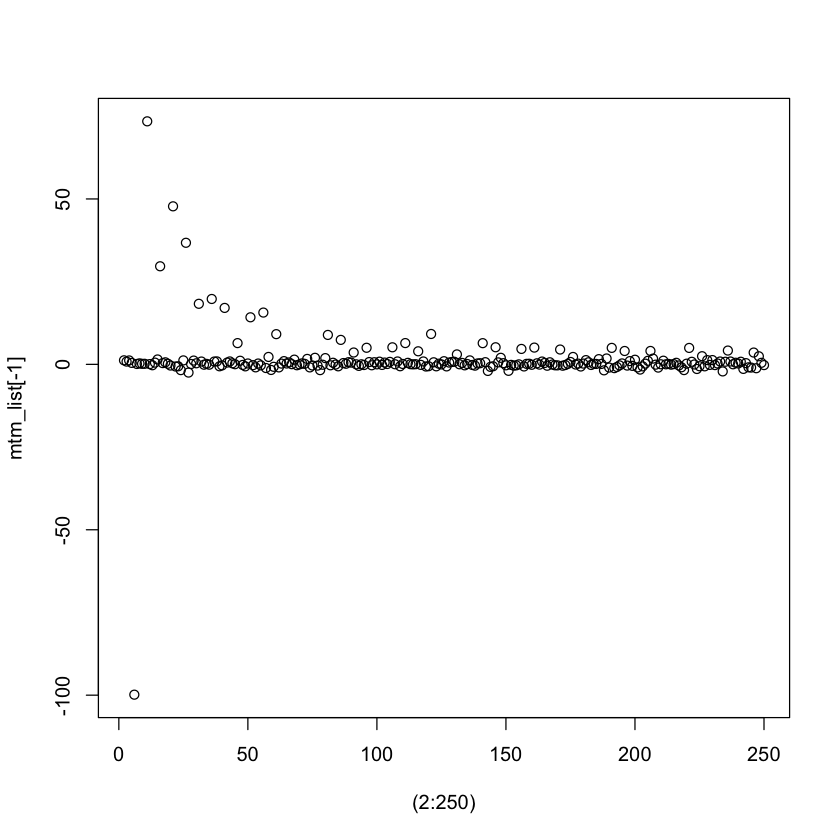

In [ ]:
# This function will purchase stocks for given day

purchaseStocks = function(df) {
    result = data.frame(stock=df[["stock"]], amt = 0, remainder = 0)
    stock = paste(result[["stock"]] ,  sep="", ".Close")
    day = df[["day"]]
    marketprice = market[[stock]][day]
    stockquantity = df[["cash"]] %/% marketprice
    result$amt = stockquantity
    remainingcash = df[["cash"]] - (stockquantity* marketprice)
    result$remainder = remainingcash
    return(result)
}


# This function will get stock values for given day
value_of_stock = function(stock, day){
    stock = paste(stock , ".Close", sep="")
    marketprice = market[[stock]][day]
    return(marketprice)
}


#This function will calculate percent change
change_of_percent = function(previous,current){
    result_p = (current - previous)/previous
    return(result_p*100)
}


#This function to calculate MTM
mtm = function(today, cash, stocks, shares){
    mtmresult = 0
    stock_length=length(stocks)

    for (x in 1:stock_length){
        value = value_of_stock(stocks[x], today) * as.numeric(shares[x])
        mtmresult = mtmresult + value
    }
    mtmresult = mtmresult + cash
    return(mtmresult)
}


#This function will find which stock SURGED the most
surged_stock = function(today, interval){
    data = market
    data = select(data,ends_with("Adj.Close"))
    surged_stock = data %>% slice(today-interval,today) %>%
    mutate(IBM = (IBM.Adj.Close - lag(IBM.Adj.Close))/lag(IBM.Adj.Close) * 100) %>%
    mutate(AMZN = (AMZN.Adj.Close - lag(AMZN.Adj.Close))/lag(AMZN.Adj.Close) * 100) %>%
    mutate(AAPL = (AAPL.Adj.Close - lag(AAPL.Adj.Close))/lag(AAPL.Adj.Close) * 100) %>%
    mutate(FB = (FB.Adj.Close - lag(FB.Adj.Close))/lag(FB.Adj.Close) * 100) %>%
    mutate(GOOG = (GOOG.Adj.Close - lag(GOOG.Adj.Close))/lag(GOOG.Adj.Close) * 100) %>%
    mutate(MSFT = (MSFT.Adj.Close - lag(MSFT.Adj.Close))/lag(MSFT.Adj.Close) * 100) %>%
    mutate(NFLX = (NFLX.Adj.Close - lag(NFLX.Adj.Close))/lag(NFLX.Adj.Close) * 100) %>%
    mutate(ORCL = (ORCL.Adj.Close - lag(ORCL.Adj.Close))/lag(ORCL.Adj.Close) * 100) %>%
    mutate(SAP = (SAP.Adj.Close - lag(SAP.Adj.Close))/lag(SAP.Adj.Close) * 100) %>%
    mutate(TSLA = (TSLA.Adj.Close - lag(TSLA.Adj.Close))/lag(TSLA.Adj.Close) * 100) %>%
    select(-contains(".Adj.Close")) %>% slice(2)
    all_data = sort(surged_stock[1,1:10])
    columns = c(colnames(all_data))
    return(columns[6:10])
}


#This function will find which stock DROPPED the most
dropped_stock = function(today, interval){
    data = market
    data = select(data,ends_with("Adj.Close"))
    dropped_stock = data %>% slice(today-interval,today) %>%
    mutate(IBM = (IBM.Adj.Close - lag(IBM.Adj.Close))/lag(IBM.Adj.Close) * 100) %>%
    mutate(AMZN = (AMZN.Adj.Close - lag(AMZN.Adj.Close))/lag(AMZN.Adj.Close) * 100) %>%
    mutate(AAPL = (AAPL.Adj.Close - lag(AAPL.Adj.Close))/lag(AAPL.Adj.Close) * 100) %>%
    mutate(FB = (FB.Adj.Close - lag(FB.Adj.Close))/lag(FB.Adj.Close) * 100) %>%
    mutate(GOOG = (GOOG.Adj.Close - lag(GOOG.Adj.Close))/lag(GOOG.Adj.Close) * 100) %>%
    mutate(MSFT = (MSFT.Adj.Close - lag(MSFT.Adj.Close))/lag(MSFT.Adj.Close) * 100) %>%
    mutate(NFLX = (NFLX.Adj.Close - lag(NFLX.Adj.Close))/lag(NFLX.Adj.Close) * 100) %>%
    mutate(ORCL = (ORCL.Adj.Close - lag(ORCL.Adj.Close))/lag(ORCL.Adj.Close) * 100) %>%
    mutate(SAP = (SAP.Adj.Close - lag(SAP.Adj.Close))/lag(SAP.Adj.Close) * 100) %>%
    mutate(TSLA = (TSLA.Adj.Close - lag(TSLA.Adj.Close))/lag(TSLA.Adj.Close) * 100) %>%
    select(-contains(".Adj.Close")) %>% slice(2)
    all_data = sort(dropped_stock[1,1:10])
    columns = c(colnames(all_data))
    return(columns[1:5])
}

# initialize variables
buying_stock = data.frame(day = 12,stock = "IBM",cash = 10000)
investment  = 5000000
stocks = list()
shares = list()
mtm_list = list()
mtm_value = list()
mtmprevious = 0
mtmcurent = 0
interval_day = 5

# 5 days rebalancing of buying LOW
for (today in 1:NROW(Date)){
    if(today %% interval_day == 1){
        # FIRST day
        if(today == 1){
            stocks = list('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
            split_investment = investment/5
            investment = 0
            for(x in stocks){
                buying_stock = data.frame(day = today ,cash = split_investment,stock = x)
                stock_dataframe = purchaseStocks(buying_stock)
                investment = investment + stock_dataframe$remainder
                shares = append(shares, stock_dataframe$amt)
            }
}
        #rebalance
        else {
            #find the 5 stocks whose "Adj Close" prices dropped the most
            mostDropped = surged_stock(today,interval_day)
            #sell all current holdings
            for(x in stocks){
                investment = investment + value_of_stock(x, today)
            }
            stocks = list()
            shares = list()
            #split your cash
            split_investment = investment/5
            #buy the max shares of stock
            stocks = mostDropped
            for(x in stocks){
                buying_stock = data.frame(day = today ,stock = x,cash = split_investment)
                stock_dataframe = purchaseStocks(buying_stock)
                investment = investment + stock_dataframe$remainder
                shares = append(shares, stock_dataframe$amt)
            }
}
    }
    mtmprevious = mtmcurent
    #USD to JPY
    mtmcurent = mtm(today, investment, stocks, shares)
    mtm_value = append(mtm_value, mtmcurent)
    mtm_list = append(mtm_list, change_of_percent(mtmprevious,mtmcurent))
}

#total
plot((2:250),mtm_value[-1])
#percent change
plot((2:250),mtm_list[-1])
#function for high-tech index
high_index = function(){
    ht = market
    htday = ht %>% select(1,3,5,7,9,11,13,15,17,19)
    return(rowMeans(htday))
}
high_average = high_index()
high_percent = list()
for(x in 2:250){
    high_percent = append(high_percent, change_of_percent(x-1,x))
}
#High-Tech Stock Percentage Comparison
plot((2:250),high_percent)